In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# For reproducibility

import random 
import torch
import os

random_seed = 44

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

os.environ['TF_DETERMINISTIC_OPS'] = '1'

## Dataset loading

In [4]:
from utils.dataset_loader import load_datasets

(texts_train, labels_train), (texts_val, labels_val), (texts_test, labels_test) = load_datasets(folder_path='dataset', 
                                                                                                divide_by_sentence=True,
                                                                                                group_numbers=True)

# Load GloVe

In [5]:
from utils.embedding_model_handler import load_embedding_model

embedding_dimension = 50

GLOVE_embeddings = load_embedding_model(folder_path='glove_pretrained', embedding_dim=embedding_dimension)

In [6]:
print(f'Embedding model size: {len(GLOVE_embeddings)}')  

Embedding model size: 400000


# OOV Terms Handling (Train set)

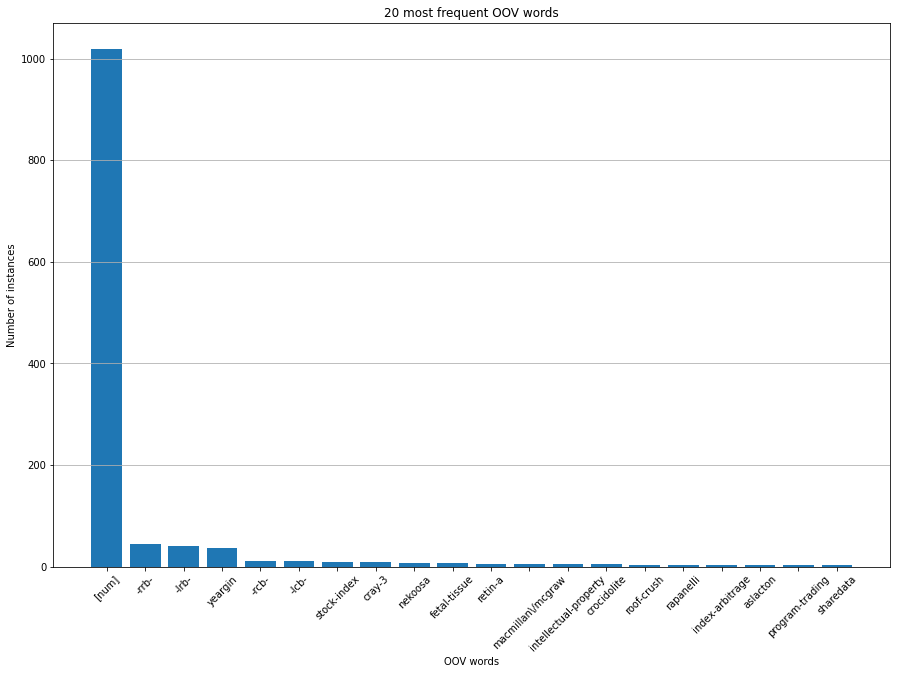

In [7]:
from utils.dataset_analysis import OOV_analysis
OOV_words, proportion_OOV_words, OOV_words_counts_dict = OOV_analysis(embedding_model=GLOVE_embeddings, texts=texts_train, plot=True)

In [8]:
print(f'Number of training OOV words: {len(OOV_words)}')
print(f'Proportion of training OOV words: {proportion_OOV_words:.2f}')

Number of training OOV words: 306
Proportion of training OOV words: 0.04


Building co-occurence matrix...
Co-occurence matrix shape: (6978, 6978)

Training OOV words...
epochs: 10 loss: 122710.09
epochs: 20 loss: 39606.555
epochs: 30 loss: 15698.759
epochs: 40 loss: 7140.377
epochs: 50 loss: 3831.9631
epochs: 60 loss: 2448.6191
epochs: 70 loss: 1851.9872
epochs: 80 loss: 1525.0919
epochs: 90 loss: 1465.9465
epochs: 100 loss: 1349.0627


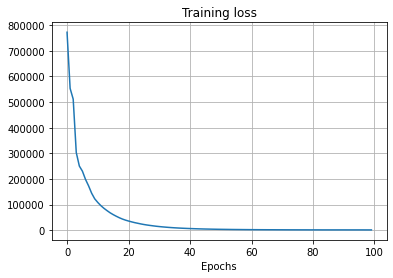

In [9]:
from utils.oov_handler import extend_embedding_model

extended_embedding_model, vocabulary_training, trained_parameters_dict_training = extend_embedding_model(embedding_model=GLOVE_embeddings,
                                                                                                texts=texts_train)

In [10]:
print(f'Extended embedding model size: {len(extended_embedding_model)}')  

Extended embedding model size: 400306


# OOV Terms Handling (Val set)

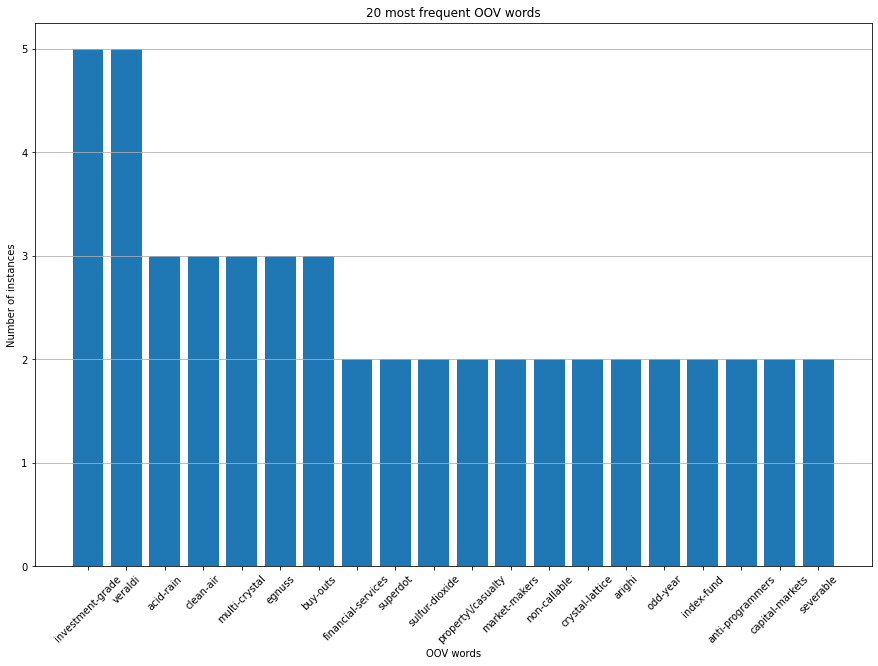

In [11]:
from utils.dataset_analysis import OOV_analysis
OOV_words, proportion_OOV_words, OOV_words_counts_dict = OOV_analysis(embedding_model=extended_embedding_model, texts=texts_val, 
                                                                      plot=True)

In [12]:
print(f'Number of validation OOV words: {len(OOV_words)}')
print(f'Proportion of validation OOV words: {proportion_OOV_words:.2f}')

Number of validation OOV words: 150
Proportion of validation OOV words: 0.03


Building co-occurence matrix...
Co-occurence matrix shape: (9208, 9208)

Training OOV words...
epochs: 10 loss: 315052.8
epochs: 20 loss: 110665.2
epochs: 30 loss: 41718.51
epochs: 40 loss: 17973.252
epochs: 50 loss: 9238.525
epochs: 60 loss: 5593.2046
epochs: 70 loss: 3973.7058
epochs: 80 loss: 3160.5527
epochs: 90 loss: 2788.318
epochs: 100 loss: 2568.238


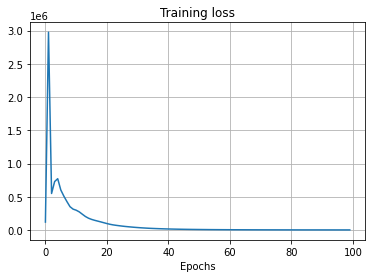

In [13]:
from utils.oov_handler import extend_embedding_model

extended_embedding_model, vocabulary_trainVal, trained_parameters_dict_trainVal = extend_embedding_model(embedding_model=extended_embedding_model,
                                                                                                texts=texts_train+texts_val,
                                                                                                previous_vocabulary=vocabulary_training,
                                                                                                previous_trained_parameters_dict=trained_parameters_dict_training)

Building co-occurence matrix...
Co-occurence matrix shape: (9208, 9208)

Training OOV words...
epochs: 10 loss: 217175.97
epochs: 20 loss: 68848.84
epochs: 30 loss: 27370.557
epochs: 40 loss: 12638.33
epochs: 50 loss: 6906.563
epochs: 60 loss: 4639.431
epochs: 70 loss: 3574.5986
epochs: 80 loss: 3052.0586
epochs: 90 loss: 2803.979
epochs: 100 loss: 2573.8494


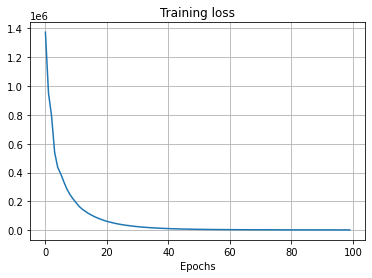

In [13]:
from utils.oov_handler import extend_embedding_model

extended_embedding_model, vocabulary_trainVal, trained_parameters_dict_trainVal = extend_embedding_model(embedding_model=extended_embedding_model,
                                                                                                texts=texts_train+texts_val)

In [14]:
print(f'Extended embedding model size: {len(extended_embedding_model)}')  

Extended embedding model size: 400456


# OOV Terms Handling (Test set)

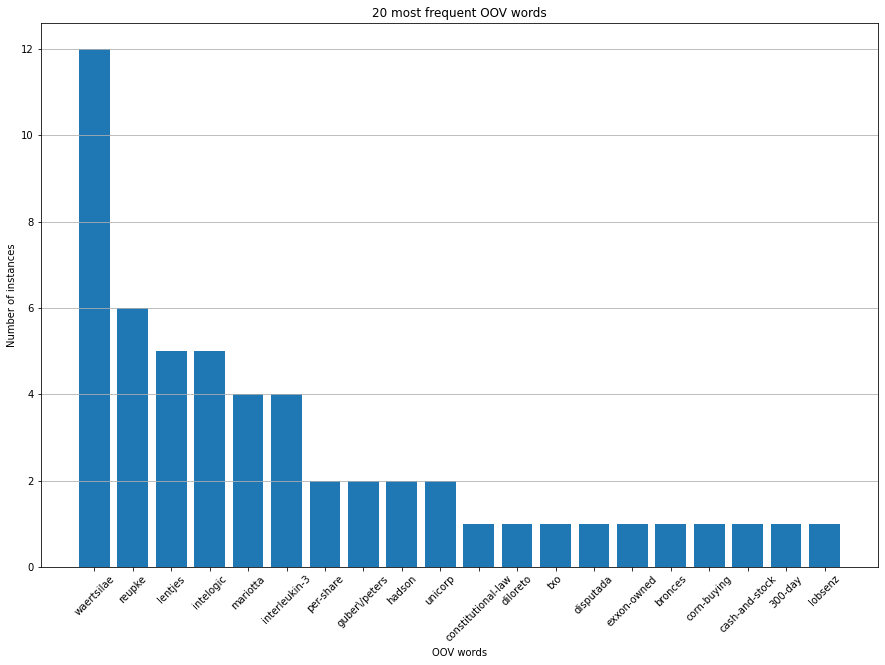

In [15]:
from utils.dataset_analysis import OOV_analysis
OOV_words, proportion_OOV_words, OOV_words_counts_dict = OOV_analysis(embedding_model=extended_embedding_model, texts=texts_test, 
                                                                      plot=True)

In [16]:
print(f'Number of validation OOV words: {len(OOV_words)}')
print(f'Proportion of validation OOV words: {proportion_OOV_words:.2f}')

Number of validation OOV words: 85
Proportion of validation OOV words: 0.03


Building co-occurence matrix...
Co-occurence matrix shape: (10060, 10060)

Training OOV words...
epochs: 10 loss: 384638.62
epochs: 20 loss: 135391.8
epochs: 30 loss: 50969.438
epochs: 40 loss: 22198.014
epochs: 50 loss: 11327.027
epochs: 60 loss: 6826.7007
epochs: 70 loss: 4815.373
epochs: 80 loss: 3878.7256
epochs: 90 loss: 3437.9714
epochs: 100 loss: 3100.9277


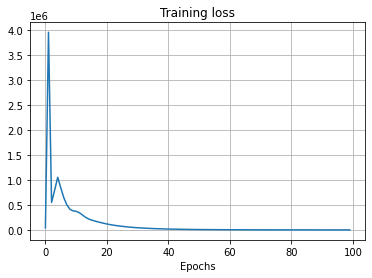

In [17]:
from utils.oov_handler import extend_embedding_model

extended_embedding_model, vocabulary_trainValTest, trained_parameters_dict_trainValTest = extend_embedding_model(embedding_model=extended_embedding_model,
                                                                                                texts=texts_train+texts_val+texts_test,
                                                                                                previous_vocabulary=vocabulary_trainVal,
                                                                                                previous_trained_parameters_dict=trained_parameters_dict_trainVal)

In [18]:
print(f'Extended embedding model size: {len(extended_embedding_model)}')  

Extended embedding model size: 400541


# OOV Terms Handling (Val set)

In [15]:
from utils.oov_handler import get_OOV_analysis
OOV_words, proportion_OOV_words, OOV_words_counts = get_OOV_analysis(embedding_model=extended_embedding_model, texts=texts_val)

In [16]:
len(OOV_words)

152

In [17]:
OOV_words

{'190-point',
 '1928-33',
 '1937-40',
 '20-stock',
 '238,000-circulation',
 '271-147',
 '29year',
 '3,040,000',
 '3,250,000',
 '300-113',
 '300-a-share',
 'acid-rain',
 'airline-related',
 'anku',
 'anti-deficiency',
 'anti-miscarriage',
 'anti-morning-sickness',
 'anti-program',
 'anti-programmers',
 'arbitraging',
 'arighi',
 'ballantine\\/del',
 'band-wagon',
 'bank-backed',
 'boogieman',
 'bottom-line',
 'breakey',
 'buy-outs',
 'c.d.s',
 'capital-markets',
 'car-care',
 'car-development',
 'card-member',
 'certin',
 'circuit-board',
 'citizen-sparked',
 'clean-air',
 'cleaner-burning',
 'contingency-fee',
 'continuingly',
 'corporate-wide',
 'crane-safety',
 'credit-rating',
 'crystal-lattice',
 'cup-tote',
 'diceon',
 'disaster-assistance',
 'double-c',
 'dydee',
 'ednie',
 'egnuss',
 'electrical-safety',
 'enzor',
 'equity-purchase',
 'executive-office',
 'express-buick',
 'fiber-end',
 'financial-services',
 'flim-flammery',
 'foldability',
 'food-industry',
 'four-foot-high',


In [18]:
proportion_OOV_words

0.030278884462151396

In [19]:
OOV_words_counts[:10]

[('investment-grade', 5),
 ('veraldi', 5),
 ('acid-rain', 3),
 ('clean-air', 3),
 ('multi-crystal', 3),
 ('egnuss', 3),
 ('buy-outs', 3),
 ('financial-services', 2),
 ('superdot', 2),
 ('sulfur-dioxide', 2)]

Building co-occurence matrix...
Co-occurence matrix shape: (5020, 5020)

Training OOV words...
epochs: 10 loss: 86816.58
epochs: 20 loss: 27537.75
epochs: 30 loss: 10698.965
epochs: 40 loss: 4811.9863
epochs: 50 loss: 2587.7969
epochs: 60 loss: 1642.0376
epochs: 70 loss: 1245.5399
epochs: 80 loss: 1073.7012
epochs: 90 loss: 954.4038
epochs: 100 loss: 870.4676


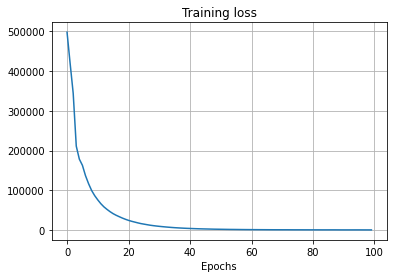

In [22]:
from utils.oov_handler import extend_embedding_model

extended_embedding_model = extend_embedding_model(embedding_model=extended_embedding_model, texts=texts_val)

In [23]:
len(extended_embedding_model)

400461

# OOV Terms Handling (Test set)

In [26]:
from utils.oov_handler import get_OOV_analysis
OOV_words, proportion_OOV_words, OOV_words_counts = get_OOV_analysis(embedding_model=extended_embedding_model, texts=texts_test)

In [27]:
len(OOV_words)

88

In [28]:
OOV_words

{'100-megabyte',
 '11,390,000',
 '11-month-old',
 '120-a-share',
 '154,240,000',
 '18-a-share',
 '19-month-old',
 '2,050-passenger',
 '226,570,380',
 '237-seat',
 '300-day',
 '36-store',
 '40-megabyte',
 '45-a-share',
 '55-a-share',
 '87-store',
 'above-market',
 'acquisition-minded',
 'arbitrage-related',
 'asset-valuation',
 'bankruptcy-law',
 'blood-cell',
 'blue-chips',
 'bread-and-butter',
 'bronces',
 'cash-and-stock',
 'cents-a-unit',
 'colorliner',
 'computer-services',
 'conn.based',
 'constitutional-law',
 'copper-rich',
 'corn-buying',
 'cost-control',
 'crookery',
 'derchin',
 'diloreto',
 'disputada',
 'disputado',
 'early-retirement',
 'ex-dividend',
 'exxon-owned',
 'g.m.b',
 'garden-variety',
 'guber\\/peters',
 'hadson',
 'hasbrouk',
 'headcount-control',
 'heavy-truck',
 'high-rolling',
 'information-services',
 'intelogic',
 'inter-tel',
 'interleukin-3',
 'johnson-era',
 'launch-vehicle',
 'lentjes',
 'life-of-contract',
 'lobsenz',
 'louisiana-pacific',
 'manmade-f

In [29]:
proportion_OOV_words

0.028720626631853787

In [30]:
OOV_words_counts[:10]

[('waertsilae', 12),
 ('reupke', 6),
 ('lentjes', 5),
 ('intelogic', 5),
 ('mariotta', 4),
 ('interleukin-3', 4),
 ('per-share', 2),
 ('guber\\/peters', 2),
 ('154,240,000', 2),
 ('hadson', 2)]

Building co-occurence matrix...
Co-occurence matrix shape: (3064, 3064)

Training OOV words...
epochs: 10 loss: 51171.047
epochs: 20 loss: 16186.734
epochs: 30 loss: 6006.426
epochs: 40 loss: 2576.5188
epochs: 50 loss: 1281.1453
epochs: 60 loss: 831.27686
epochs: 70 loss: 595.9852
epochs: 80 loss: 514.79486
epochs: 90 loss: 469.40033
epochs: 100 loss: 391.29572


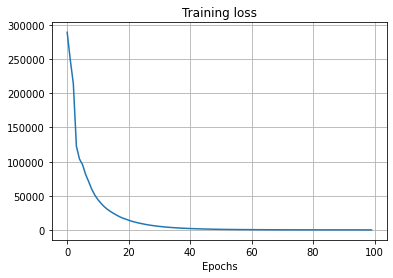

In [31]:
from utils.oov_handler import extend_embedding_model

extended_embedding_model = extend_embedding_model(embedding_model=extended_embedding_model, texts=texts_test)

In [32]:
len(extended_embedding_model)

400549

## Saving the extended Glove embeddings

In [34]:
from utils.embedding_model_handler import store_embedding_model

store_embedding_model(embedding_path=f'glove_pretrained/extended_glove.{embedding_dimension}d.txt', embedding_model=extended_embedding_model)